In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Preparação do Dataset 

In [2]:
# carrega dados da base de iris
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris['class'] = data['target']

# define atributos e possíveis saídas da classificação com dois atributos
X = iris.iloc[:,0:4].values
y = iris['class'].values

# define separação da base para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# opções de seleção para a primeira parte do exercício
sep_classes = {0: 'Iris-setosa', 1: 'Iris-versicolor'}

# separação do dataset para as classes setosa e versicolor
iris_sep = iris.loc[iris['class'].isin(sep_classes.keys())]
X_sep = iris_sep.iloc[:, 0:4].values
y_sep = iris_sep['class'].values

# define separação da base para treino e teste para o Perceptron
X_ppn_train, X_ppn_test, y_ppn_train, y_ppn_test = train_test_split(X_sep, y_sep, test_size = 0.3, random_state=1)

# dicionário de classes
class_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

### Perceptron

In [3]:
# define parâmetros do modelo 
ppn_sep = Perceptron(tol = 1e-3, random_state = 0).fit(X_ppn_train, y_ppn_train)

# realiza predição do modelo
y_pred_ppn_sep = ppn_sep.predict(X_ppn_test)

print('\nPerceptron com as classes ''setosa'' e ''versicolor'':')
print('\nScore \n', ppn_sep.score(X_ppn_test, y_ppn_test))
print('\nMatriz de Erro \n', confusion_matrix(y_ppn_test, y_pred_ppn_sep))

ppn = Perceptron(tol = 1e-3, random_state = 0).fit(X_train, y_train)
y_pred_ppn = ppn.predict(X_test)

print('\nPerceptron com todas as classes:')
print('\nScore \n', ppn.score(X_test, y_test))
print('\nMatriz de Erro \n', confusion_matrix(y_test, y_pred_ppn))


Perceptron com as classes setosa e versicolor:

Score 
 1.0

Matriz de Erro 
 [[14  0]
 [ 0 16]]

Perceptron com todas as classes:

Score 
 0.7555555555555555

Matriz de Erro 
 [[10  4  0]
 [ 0 17  1]
 [ 0  6  7]]


### Multi Layer Perceptron

In [4]:
# define parâmetros do modelo 
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter = 600, alpha = 0.0001, solver = 'lbfgs', 
                    random_state = 21, tol = 0.000000001).fit(X_train, y_train)

# realiza predição do modelo
y_pred_mlp = mlp.predict(X_test)

print('\nMulti Layer Perceptron com todas as classes:')
print('\nScore \n', mlp.score(X_test, y_test))
print('\nMatriz de Erro \n', confusion_matrix(y_test, y_pred_mlp))


Multi Layer Perceptron com todas as classes:

Score 
 1.0

Matriz de Erro 
 [[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


#### Função para gerar gráfico dos dados e regiões a partir de duas características do dataset:

In [5]:
def plot_decision_line (X, y, class_dict, colors, title, legend, clf, n):
    
    # identifica valores máximos e mínimos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # gera pontos no gráfico a uma distância n
    xp, yp = np.meshgrid(np.arange(x_min, x_max, n), np.arange(y_min, y_max, n))

    # realiza predição do classificador
    Z = clf.predict(np.c_[xp.ravel(), yp.ravel()]).reshape(xp.shape)

    # plota os dados no gráfico
    for l, c in zip(class_dict.keys(), colors):
    
        if (l == 0):
            text = class_dict[l]
        
        elif (l == 1):
            text = class_dict[l]
        
        plt.scatter(X[y == l, 0], X[y == l, 1], c = c, marker = '^', label = text)

    # destaca o contorno das regiões de decisão
    plt.contourf(xp, yp, Z, alpha = 0.2, cmap = cm.magma)
    plt.title(title)
    plt.legend(loc = legend)
    plt.show()

#### Escolha dos atributos para gerar gráficos em 2D:

In [6]:
# 0 -> sepal length (cm)
# 1 -> sepal width (cm)
# 2 -> petal length (cm)
# 3 -> petal width (cm)

fd = 0 # x -> first dimension
sd = 2 # y -> second dimension

### Perceptron (2D)

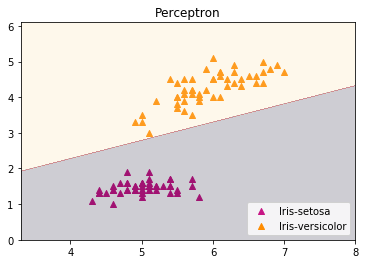

In [7]:
# executa o modelo em duas dimensões com as classes setosa e versicolor
ppn_2d = Perceptron(tol = 1e-3, random_state = 0).fit(X_ppn_train[:,[fd,sd]], y_ppn_train)

# seleciona cores
ppn_colors = ['mediumvioletred', 'darkorange']

# plota gráfico com os dados e linha de decisão do classificador
plot_decision_line(X_sep[:,[fd,sd]], y_sep, sep_classes, ppn_colors, 'Perceptron', 'lower right', ppn_2d, .001)

### Multi Layer Perceptron (2D)

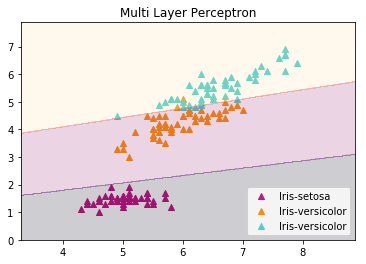

In [8]:
# executa o modelo em duas dimensões com todas as classes
mlp_2d = MLPClassifier(hidden_layer_sizes = (10), 
                       max_iter = 500, alpha = 0.0001, solver = 'lbfgs', 
                       random_state = 21,tol = 0.000000001).fit(X_train[:,[fd,sd]], y_train) 

# seleciona cores
mlp_colors = ['mediumvioletred', 'darkorange', 'mediumturquoise']

# plota gráfico com os dados e linha de decisão do classificador
plot_decision_line(X[:,[fd,sd]], y, class_map, mlp_colors, 'Multi Layer Perceptron', 'lower right', mlp_2d, .02)